In [2]:
import pandas as pd
import numpy as np
import random

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

wine =  pd.read_csv("wine.csv")
wine

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Class Label
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,NaN,5.64,1.04,NaN,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [3]:
print(wine.isnull().sum())

Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 1
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    1
Proline                         0
Class Label                     0
dtype: int64


In [4]:
wine["Proanthocyanins"] = wine["Proanthocyanins"].fillna(wine["Proanthocyanins"].mean())

wine["OD280/OD315 of diluted wines"] = wine["OD280/OD315 of diluted wines"].fillna(wine["OD280/OD315 of diluted wines"].mean())

print(wine.isnull().sum())

Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
Class Label                     0
dtype: int64


In [5]:
wine["Class Label"].unique()

array([0, 1, 2])

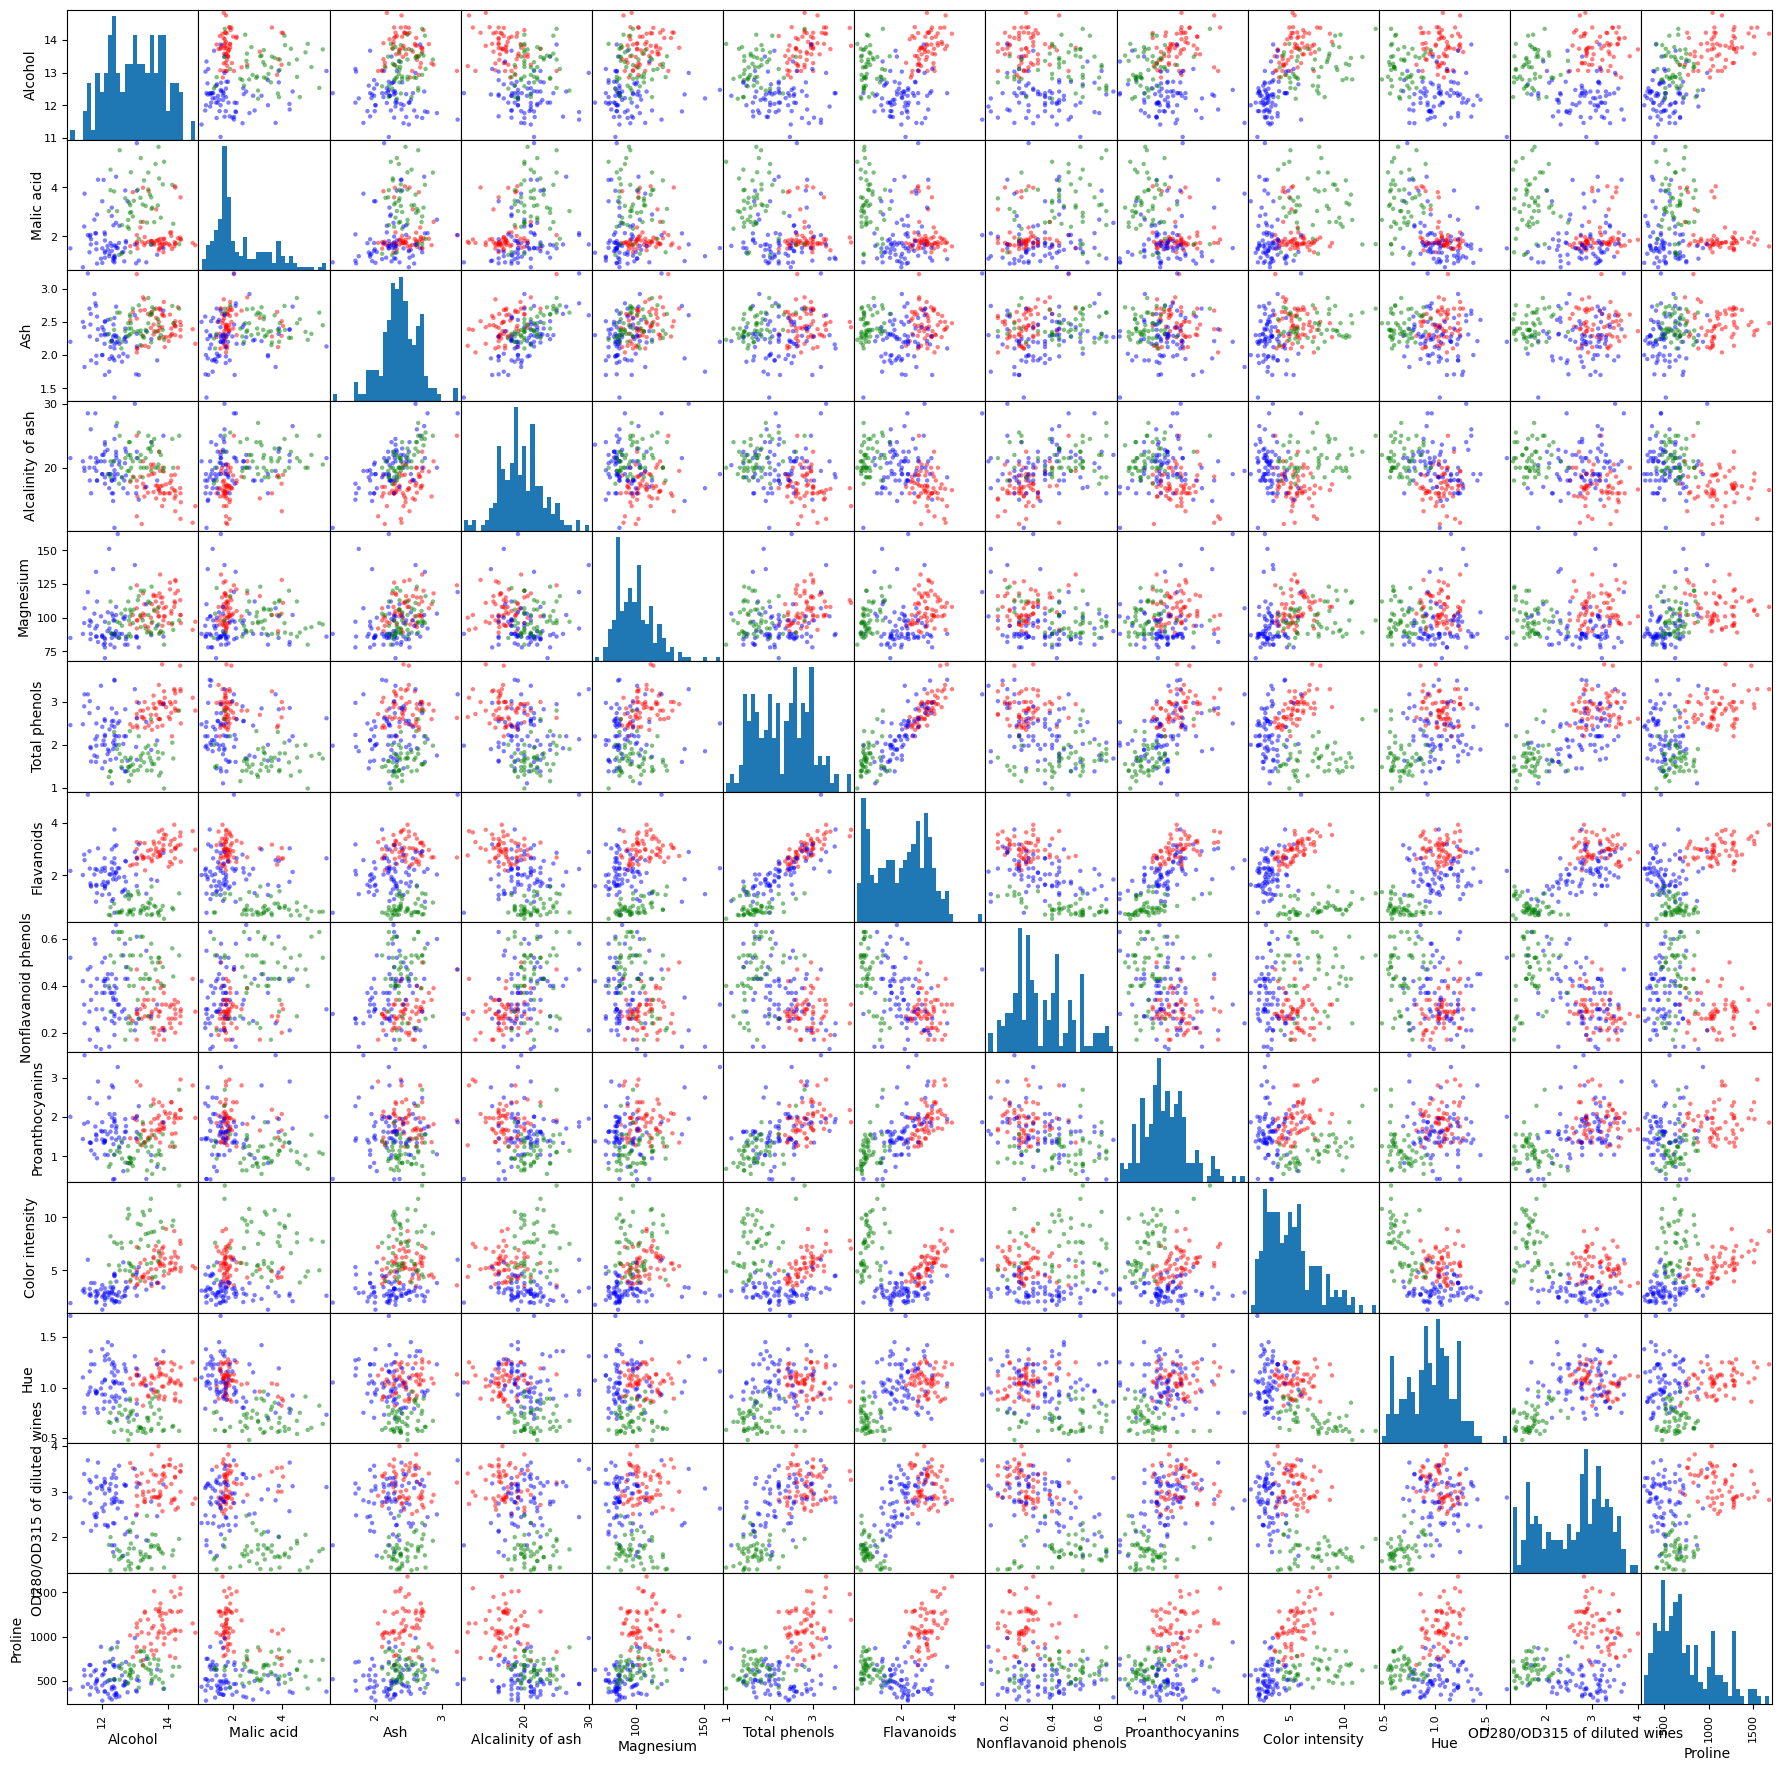

In [6]:
scatter_matrix(
    wine.drop("Class Label", axis=1), 
    c = wine["Class Label"].map({
        0: "red", 1: "blue", 2: "green"
    }), 
    marker = "o",
    s = 10,
    hist_kwds = {"bins": 30},
    figsize = (22,22)
)

plt.show()

In [7]:
def boxplot(wine):
    plt.figure(figsize=(20,12))
    # print(wine.columns)

    subplot_number = 1
    for i in wine.columns:
        plt.subplot(len(wine.columns)//7 + 1, len(wine.columns)//2, subplot_number)
        plt.boxplot(wine[i])
        plt.title(i)
        subplot_number += 1

    return plt.show()

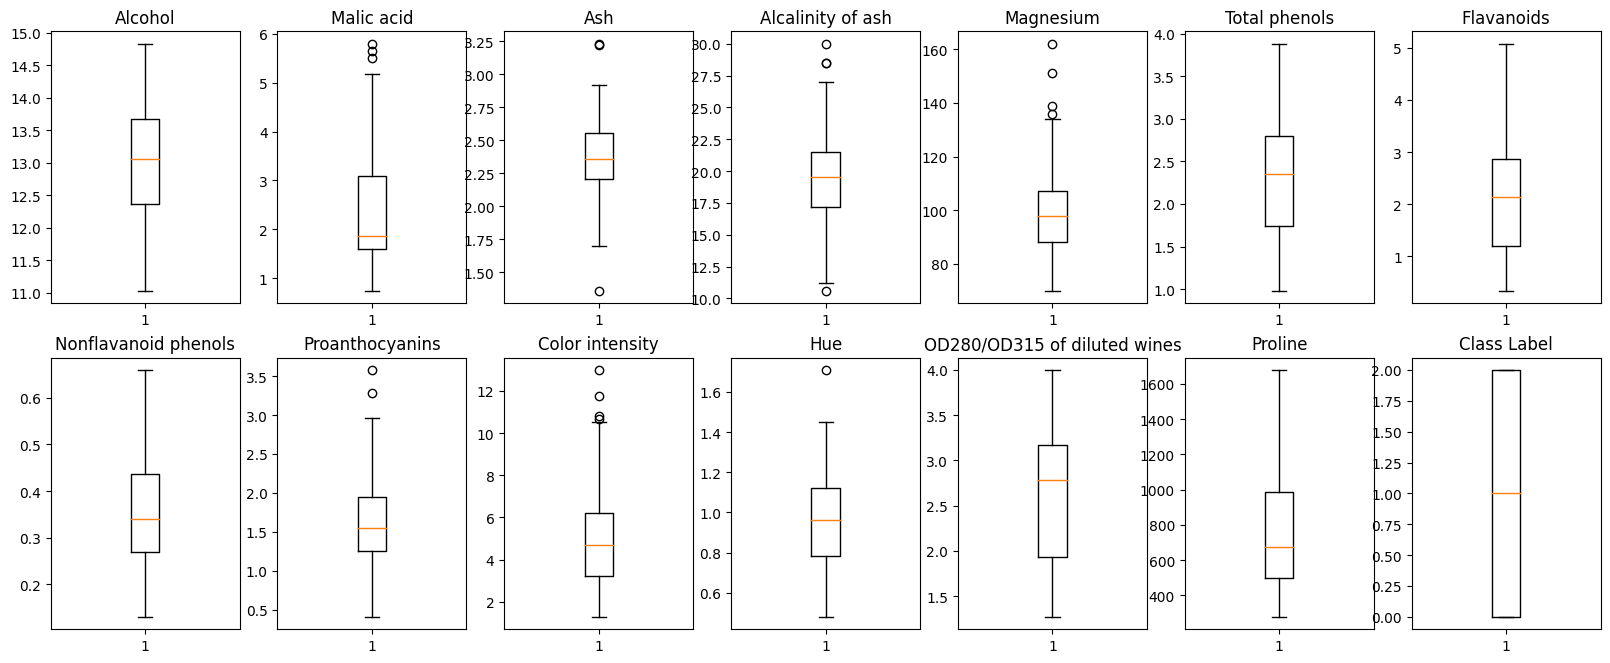

In [8]:
boxplot(wine)

In [9]:
def delete_outliers():
    UPPER, LOWER = [], []

    for i in wine.columns: 
        Q1 = np.percentile(wine[i], 25, method = 'midpoint')
        Q3 = np.percentile(wine[i], 75, method = 'midpoint')
        IQR = Q3 - Q1

        upper = wine.index[wine[i] >= (Q3 + 1.5*IQR)].tolist()
        lower = wine.index[wine[i] <= (Q1 - 1.5*IQR)].tolist()
    
        UPPER.append(upper) 
        LOWER.append(lower) 

    UPPER = sum(UPPER,[])
    LOWER = sum(LOWER,[])

    ''' removing the outliers '''
    wine.drop(list(set(UPPER + LOWER)), inplace = True)
    wine.reset_index(drop = True, inplace = True)

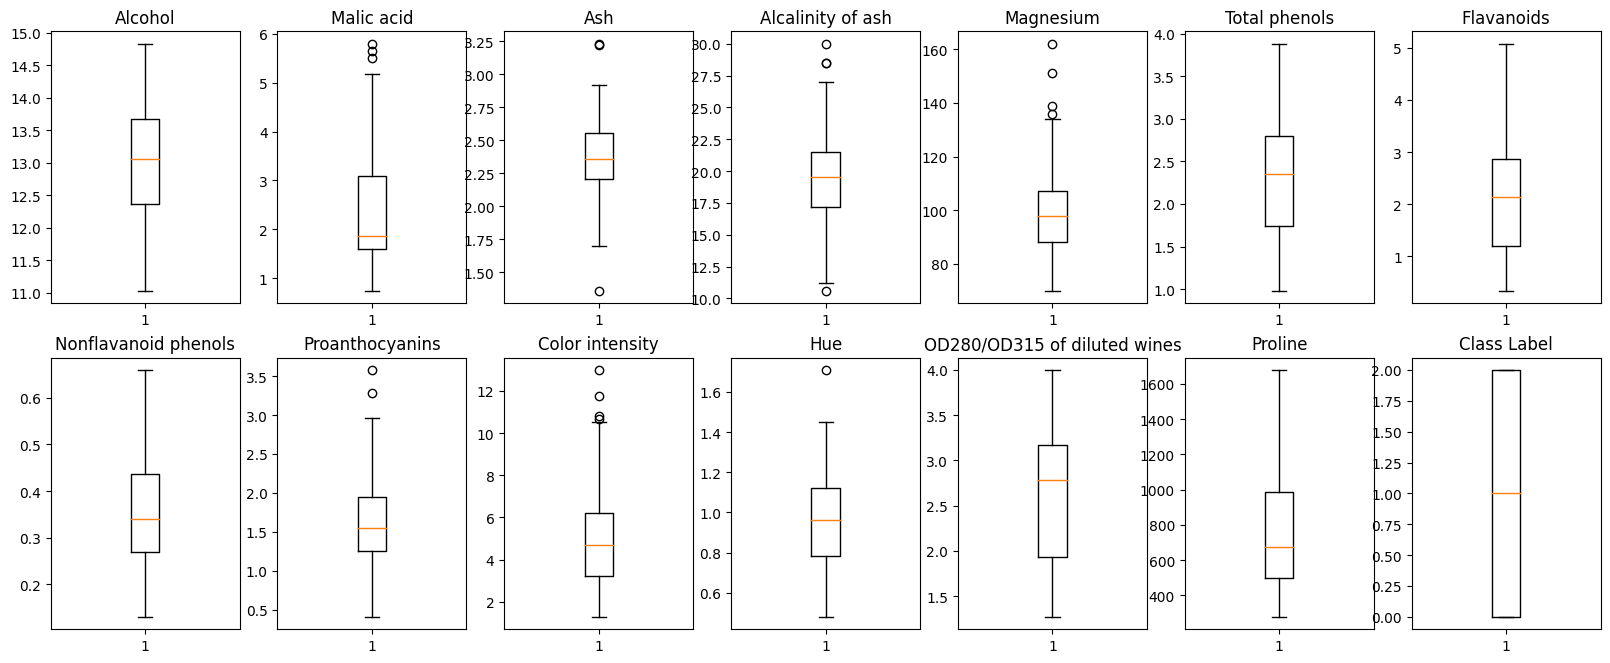

In [10]:
# delete_outliers()
boxplot(wine)

In [11]:
# short example of StandartScaler

data = {
    "intensity": [1,2,3,78,9,8,7,77]  
}

df = pd.DataFrame(data)
print(df)

scaler = StandardScaler()

scaler.fit(df)
print("\n", scaler.transform(df), "\n")

print(pd.DataFrame(scaler.transform(df), columns=df.columns))

   intensity
0          1
1          2
2          3
3         78
4          9
5          8
6          7
7         77

 [[-0.70216537]
 [-0.67042909]
 [-0.6386928 ]
 [ 1.74152881]
 [-0.44827507]
 [-0.48001136]
 [-0.51174765]
 [ 1.70979252]] 

   intensity
0  -0.702165
1  -0.670429
2  -0.638693
3   1.741529
4  -0.448275
5  -0.480011
6  -0.511748
7   1.709793


In [12]:
scaler = StandardScaler()
scaler.fit(wine.drop("Class Label", axis=1)) # compute the mean and std to be used for later scaling

x = pd.DataFrame(scaler.transform(wine.drop("Class Label", axis=1)), columns=wine.columns[:-1])
y = wine[["Class Label"]]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

knn = KNeighborsClassifier(n_neighbors=3, metric="euclidean") # minkowski, manhattan, cosine, euclidean
knn.fit(x_train, y_train.values.ravel())
y_hat = knn.predict(x_test)

print(classification_report(y_test, y_hat))
print(accuracy_score(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        18
           1       1.00      0.85      0.92        27
           2       0.82      1.00      0.90         9

    accuracy                           0.93        54
   macro avg       0.91      0.95      0.92        54
weighted avg       0.94      0.93      0.93        54

0.9259259259259259


### __Precision and recall__

![image](Precision-recall.svg.png)

### __F1-score, support & accuracy__

__F1-score__ is the weighted average of Precision and Recall: 
$\frac{1}{f_1}=2\cdot \left( \frac{1}{recall}+\frac{1}{precision} \right)$

Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution. Accuracy works best if false positives and false negatives have similar cost. If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall.

__Support__ is the number of actual occurrences of the class in the specified dataset.

__Accuracy__ is a correct predictions out of total examples: $\ \frac{TP+TN}{TP+TN+FP+FN}$


In [13]:
train = pd.concat([x_train, y_train], axis=1)
test = pd.concat([x_test, y_test], axis=1)

predicted = pd.concat([x_test, pd.DataFrame(y_hat, columns = ["Class Label"], index = test.index.to_list())], axis=1)

In [14]:
def compare(pair, colormap):
    sns.pairplot(
        data = test, 
        x_vars = pair[0], y_vars = pair[1],
        height = 4,
        hue = "Class Label",
        palette = colormap,
    ).fig.suptitle("Test data",  y=1.05)

    sns.pairplot(
        data = predicted, 
        x_vars = pair[0], y_vars = pair[1],
        height = 4,
        hue = "Class Label",
        palette = colormap
    ).fig.suptitle("Predicted data",  y=1.05)

    return plt.show()

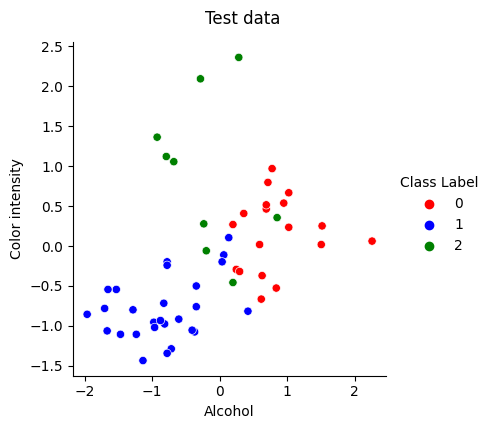

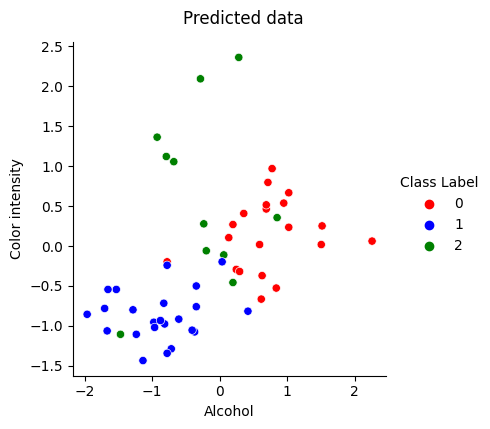

In [15]:
pair = ["Alcohol", "Color intensity"]
colormap = {
    0: "red", 
    1: "blue", 
    2: "green"
}

compare(pair, colormap)